<a href="https://colab.research.google.com/github/comHack/Mammography_DL_Classification/blob/master/data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries**

In [28]:
import numpy as np

import pickle

import cv2 as cv

import matplotlib.pyplot as plt

import os

import random

from google.colab import drive

# **Mounting Drive**

In [2]:
drive.mount('/gdrive')
os.symlink('/gdrive/My Drive', '/content/gdrive')

Mounted at /gdrive


# **Data**

## **Setup the data**

In [3]:
# data folder link to the images_resized_2 folder in your drive
data_folder = '/gdrive/My Drive/Breast Cancer Detection/images_resized_2'

# classes
classes = ['benign', 'malign']

In [5]:
print(os.listdir(os.path.join(data_folder, classes[0]))[:10])

['aug_989.png', 'aug_990.png', 'aug_991.png', 'aug_992.png', 'aug_993.png', 'aug_994.png', 'aug_995.png', 'aug_996.png', 'aug_997.png', 'aug_998.png']


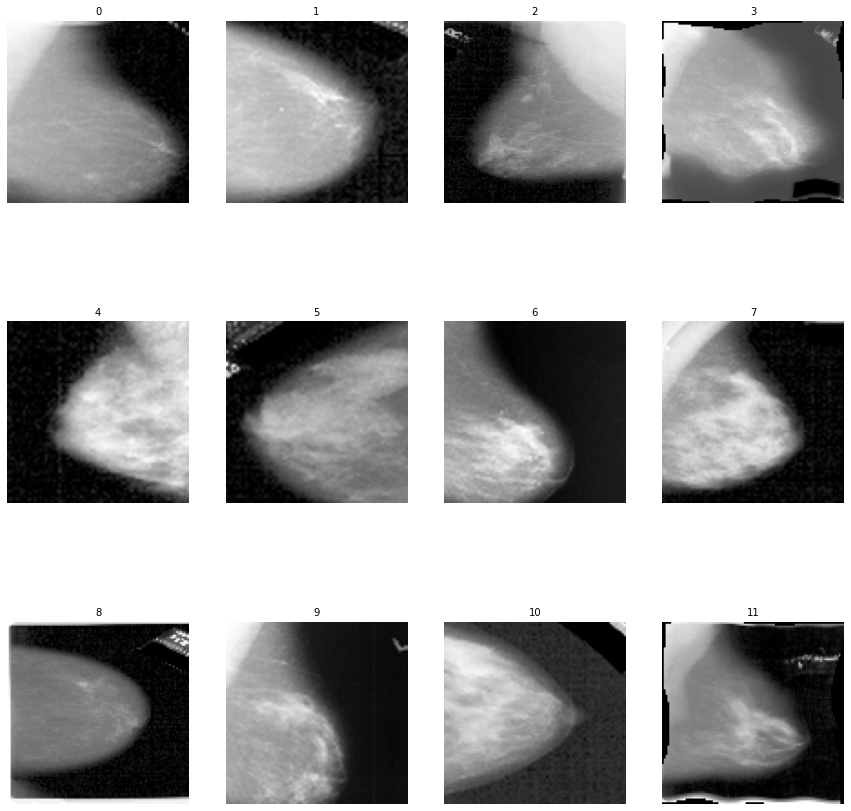

In [6]:
W_grid = 3
L_grid = 4

fig, ax = plt.subplots(W_grid, L_grid, figsize = (15, 15))

ax = ax.ravel()

classe = 0

path = os.path.join(data_folder, classes[classe])

images = os.listdir(path)

for i in range((W_grid * L_grid)):

  image = os.path.join(path, images[random.randint(0, len(images))]) 

  image_arr = cv.imread(image, cv.IMREAD_GRAYSCALE)

  new_arr = image_arr / 255

  ax[i].imshow(image_arr, cmap='gray')

  ax[i].set_title(i, fontsize = 10)

  ax[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

In [7]:
print(image_arr.shape)

(100, 100)


### **Grayscale images**

In [10]:
def create_data():
  '''
    create the data as grayscale images (1 channel (cv.IMREAD_GRAYSCALE))
    
    returns a list of pairs containing the image matrix and it's label
  '''
  data = []
  for classe in classes:
    path = os.path.join(data_folder, classe)
    classe_num = classes.index(classe)
    for image in os.listdir(path):
      image_arr = cv.imread(os.path.join(path, image), cv.IMREAD_GRAYSCALE)
      data.append([image_arr, classe_num])
    
  return data

In [9]:
# creating the data (grayscale images)
data = create_data()

In [11]:
A = data.copy()

In [12]:
print(len(data))

3988


In [13]:
# seperating the benign and the malign (grayscale images)
benign_data = A[:1988].copy()
malign_data = A[1988:].copy()

In [14]:
print(len(benign_data))

1988


In [15]:
print(len(malign_data))

2000


In [16]:
print(benign_data[1987][1])

0


### **RGB images**

In [17]:
def create_data_3():
  '''
    create the data as rgb images (3 channels)

    returns a list of pairs containing the image matrix and it's label 
  '''
  data = []
  for classe in classes:
    path = os.path.join(data_folder, classe)
    classe_num = classes.index(classe)
    for image in os.listdir(path):
      image_arr = cv.imread(os.path.join(path, image))
      data.append([image_arr, classe_num])
    
  return data

In [18]:
# creating the data (rgb images)
data_3 = create_data_3()

In [19]:
A_3 = data_3.copy()

In [20]:
print(A_3[2])
print(len(A_3))

[array([[[  3,   3,   3],
        [  7,   7,   7],
        [  5,   5,   5],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  2,   2,   2],
        [  3,   3,   3],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 11,  11,  11],
        [ 25,  25,  25],
        [ 19,  19,  19],
        ...,
        [240, 240, 240],
        [253, 253, 253],
        [  0,   0,   0]],

       ...,

       [[204, 204, 204],
        [223, 223, 223],
        [242, 242, 242],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [  0,   0,   0]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]

In [21]:
# seperating the benign and the malign (rgb images)
benign_data_3 = A_3[:1988].copy()
malign_data_3 = A_3[1988:].copy()

## **Saving data for later usage**

Save a raw copy to be preprocessed later for each model experiment (different data shuffle for each model experiment).

### **Grayscale images**

In [ ]:
# saving the arrays as pickle files for later usage (grayscale images)
pickle_out = open("benign.pickle", "wb")
pickle.dump(benign_data, pickle_out)
pickle_out.close()

pickle_out = open("malign.pickle", "wb")
pickle.dump(malign_data, pickle_out)
pickle_out.close()

### **RGB images**

In [ ]:
# saving the arrays as pickle files for later usage (rgb images)
pickle_out = open("benign_3.pickle", "wb")
pickle.dump(benign_data_3, pickle_out)
pickle_out.close()

pickle_out = open("malign_3.pickle", "wb")
pickle.dump(malign_data_3, pickle_out)
pickle_out.close()

## **Preparing common data for all model experiments**

In case we want to use same data distribution for all model experiments (Same data shuffle).

### **Grayscal images**

In [22]:
# shuffle the data
random.shuffle(benign_data)
random.shuffle(malign_data)

In [23]:
# splitting and merging the data from benign and malign arrays

# split eg. train_per = 0.7 --> 70% train data, 30% test data
train_per = 0.7

trn_b = int(len(benign_data) * train_per)

trn_m = int(len(malign_data) * train_per)

train_data = benign_data[: trn_b].copy() + malign_data[: trn_m].copy()

test_data = benign_data[trn_b :].copy() + malign_data[trn_m :].copy()

In [24]:
# shuffle train and test data
random.shuffle(train_data)
random.shuffle(test_data)

In [25]:
assert len(train_data + test_data) == len(benign_data + malign_data)

In [26]:
# separating the features and labels

X_train = []
y_train = []

X_test = []
y_test = []

for X, y in train_data:
  X_train.append(X)
  y_train.append(y)

for X, y in test_data:
  X_test.append(X)
  y_test.append(y)


In [29]:
# reshaping 

num_channels = 1 # depend whether you're using rgb or grayscale images

IMG_SIZE = len(X_train[0])

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, num_channels)

y_train = np.array(y_train).reshape(-1)

IMG_SIZE = len(X_test[0])

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, num_channels)

y_test = np.array(y_test).reshape(-1)

In [30]:
print(X_train.shape)
print(X_test.shape)

(2791, 100, 100, 1)
(1197, 100, 100, 1)


**Scaling**

In [31]:
X_train = X_train / 255
X_test = X_test / 255

### **RGB images**

In [32]:
# shuffle the data
random.shuffle(benign_data_3)
random.shuffle(malign_data_3)

In [33]:
# splitting and merging the data from benign and malign arrays

# split eg. train_per = 0.7 --> 70% train data, 30% test data
train_per = 0.7

trn_b_3 = int(len(benign_data_3) * train_per)

trn_m_3 = int(len(malign_data_3) * train_per)

train_data_3 = benign_data_3[: trn_b_3].copy() + malign_data_3[: trn_m_3].copy()

test_data_3 = benign_data_3[trn_b_3 :].copy() + malign_data_3[trn_m_3 :].copy()

In [34]:
# shuffle train and test data
random.shuffle(train_data_3)
random.shuffle(test_data_3)

In [35]:
assert len(train_data_3 + test_data_3) == len(benign_data_3 + malign_data_3)

In [36]:
# separating the features and labels

X_train_3 = []
y_train_3 = []

X_test_3 = []
y_test_3 = []

for X, y in train_data_3:
  X_train_3.append(X)
  y_train_3.append(y)

for X, y in test_data_3:
  X_test_3.append(X)
  y_test_3.append(y)


In [37]:
# reshaping 

num_channels = 3 # depend whether you're using rgb or grayscale images

IMG_SIZE = len(X_train_3[0])

X_train_3 = np.array(X_train_3).reshape(-1, IMG_SIZE, IMG_SIZE, num_channels)

y_train_3 = np.array(y_train_3).reshape(-1)

IMG_SIZE = len(X_test_3[0])

X_test_3 = np.array(X_test_3).reshape(-1, IMG_SIZE, IMG_SIZE, num_channels)

y_test_3 = np.array(y_test_3).reshape(-1)

In [38]:
print(X_train_3.shape)
print(X_test_3.shape)

(2791, 100, 100, 3)
(1197, 100, 100, 3)


**Scaling**

In [39]:
X_train_3 = X_train_3 / 255
X_test_3 = X_test_3 / 255

### **Saving common data for later usage**

Save the common data to be used for all model experiment.

#### **Grayscale images**

In [42]:
# saving the arrays as pickle files for later usage (grayscale images)
pickle_out = open("/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/X_train.pickle", "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/y_train.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

#### **RGB images**

In [43]:
# saving the arrays as pickle files for later usage (rgb images)
pickle_out = open("/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/RGB IMAGES ARRAY/X_train_3.pickle", "wb")
pickle.dump(X_train_3, pickle_out)
pickle_out.close()

pickle_out = open("/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/RGB IMAGES ARRAY/y_train_3.pickle", "wb")
pickle.dump(y_train_3, pickle_out)
pickle_out.close()

pickle_out = open("/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/RGB IMAGES ARRAY/X_test_3.pickle", "wb")
pickle.dump(X_test_3, pickle_out)
pickle_out.close()

pickle_out = open("/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/RGB IMAGES ARRAY/y_test_3.pickle", "wb")
pickle.dump(y_test_3, pickle_out)
pickle_out.close()